## GitHub URL: https://github.com/gsahai1x/AIML

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [2]:
# nltk.download('stopwords')                              # Download Stopwords.
# nltk.download('punkt')
# nltk.download('wordnet')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
# from yellowbrick.classifier import ClassificationReport, ROCAUC
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
from sklearn import set_config
set_config(print_changed_only=False)
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

In [4]:
#nlp librarie
import re, string, unicodedata
import contractions
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

### Load Dataset

In [5]:
df = pd.read_csv('Tweets.csv')

### Print Shape of Data

In [6]:
df.shape

(14640, 15)

### Data Description

In [7]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,"14,640.00","14,640.00","10,522.00","14,640.00"
mean,"569,218,351,767,382,528.00",0.90,0.64,0.08
std,"779,111,158,481,836.75",0.16,0.33,0.75
min,"567,588,278,875,213,824.00",0.34,0.00,0.00
25%,"568,559,178,101,439,488.00",0.69,0.36,0.00
50%,"569,477,857,923,110,912.00",1.00,0.67,0.00
75%,"569,890,473,289,000,960.00",1.00,1.00,0.00
max,"570,310,600,460,525,568.00",1.00,1.00,44.00


In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### Understand of data-columns

#### Drop all other columns except “text” and “airline_sentiment”.

In [10]:
dfs = df[['text','airline_sentiment']]

#### Check the shape of data

In [11]:
dfs.shape

(14640, 2)

#### Print first 5 rows of data.

In [12]:
dfs

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


#### Data Distribution

In [13]:
dfs['airline_sentiment'].value_counts().values

array([9178, 3099, 2363], dtype=int64)

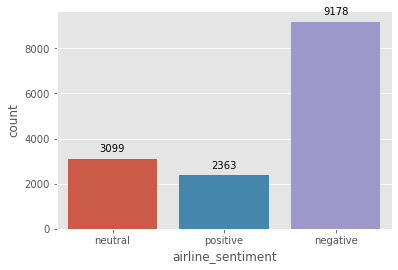

In [14]:
fig = sns.countplot(x='airline_sentiment', data=dfs)
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Check for Null

In [15]:
dfs.isnull().sum(axis=0) 

text                 0
airline_sentiment    0
dtype: int64

### Text Preprocessing

In [16]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

In [17]:
dfs.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",positive


#### Html tag removal

In [18]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

dfs['text'] = dfs['text'].apply(lambda x: strip_html(x))
dfs.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",positive


#### Removal of Contractions

In [19]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

dfs['text'] = dfs['text'].apply(lambda x: replace_contractions(x))
dfs.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
8,"@virginamerica Well, I did not…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. you are too good to me.",positive


>* didn't became "did not"

#### Remove the numbers.

In [20]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

dfs['text'] = dfs['text'].apply(lambda x: remove_numbers(x))
dfs.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpGgrEZP",neutral
8,"@virginamerica Well, I did not…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. you are too good to me.",positive


>* 7 was removed from WpG7grEZP

#### Removal of Special Characters and Punctuations.

In [21]:
def remove_punctuations(text):
  text = re.sub(r'[.|,|)|(|\|/|\'|\n|"]',r' ', text) # Removing punctuation
  return text
dfs['text'] = dfs['text'].apply(lambda x: remove_punctuations(x))
dfs.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said,neutral
1,@VirginAmerica plus you have added commercials to the experience tacky,positive
2,@VirginAmerica I did not today Must mean I need to take another trip!,neutral
3,@VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces & they have little recourse,negative
4,@VirginAmerica and it is a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $ a flight for seats that did not have this playing it is really the only bad thing about flying VA,negative
6,@VirginAmerica yes nearly every time I fly VX this “ear worm” will not go away :,positive
7,@VirginAmerica Really missed a prime opportunity for Men Without Hats parody there https: t co mWpGgrEZP,neutral
8,@virginamerica Well I did not…but NOW I DO! :-D,positive
9,@VirginAmerica it was amazing and arrived an hour early you are too good to me,positive


>* guests' became guests

#### Conversion to lowercase

In [22]:
def conv_lower(text):
  text = text.lower()                 # Converting to lowercase
  return text
dfs['text'] = dfs['text'].apply(lambda x: conv_lower(x))
dfs.head(10)

,text,airline_sentiment
0,@virginamerica what @dhepburn said,neutral
1,@virginamerica plus you have added commercials to the experience tacky,positive
2,@virginamerica i did not today must mean i need to take another trip!,neutral
3,@virginamerica it is really aggressive to blast obnoxious entertainment in your guests faces & they have little recourse,negative
4,@virginamerica and it is a really big bad thing about it,negative
5,@virginamerica seriously would pay $ a flight for seats that did not have this playing it is really the only bad thing about flying va,negative
6,@virginamerica yes nearly every time i fly vx this “ear worm” will not go away :,positive
7,@virginamerica really missed a prime opportunity for men without hats parody there https: t co mwpggrezp,neutral
8,@virginamerica well i did not…but now i do! :-d,positive
9,@virginamerica it was amazing and arrived an hour early you are too good to me,positive


#### Tokenization

In [23]:
dfs['text'] = dfs.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [24]:
dfs.head(10)

,text,airline_sentiment
0,"[@, virginamerica, what, @, dhepburn, said]",neutral
1,"[@, virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[@, virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip, !]",neutral
3,"[@, virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, &, they, have, little, recourse]",negative
4,"[@, virginamerica, and, it, is, a, really, big, bad, thing, about, it]",negative
5,"[@, virginamerica, seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, va]",negative
6,"[@, virginamerica, yes, nearly, every, time, i, fly, vx, this, “, ear, worm, ”, will, not, go, away, :]",positive
7,"[@, virginamerica, really, missed, a, prime, opportunity, for, men, without, hats, parody, there, https, :, t, co, mwpggrezp]",neutral
8,"[@, virginamerica, well, i, did, not…but, now, i, do, !, :, -d]",positive
9,"[@, virginamerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]",positive


#### Lemmatize or stemming. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.). Print first 5 rows of data after pre-processing.

In [25]:
from nltk.corpus import stopwords                   #Stopwords corpus
stopwords = stopwords.words('english')
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","don't","aren't","aren","no","couldn"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stopwords) - set(customlist)) 

In [26]:
stopwords

['myself',
 "should've",
 'can',
 'his',
 'themselves',
 'with',
 'had',
 'for',
 'after',
 'above',
 'such',
 'which',
 'most',
 'have',
 'i',
 'them',
 'd',
 'are',
 'doing',
 'been',
 'down',
 't',
 'should',
 'she',
 'once',
 'any',
 'itself',
 'why',
 'o',
 'these',
 'through',
 'll',
 'both',
 'yourself',
 'herself',
 'her',
 'just',
 'its',
 'was',
 'were',
 'if',
 'him',
 's',
 'over',
 'than',
 'into',
 "that'll",
 'then',
 'off',
 'but',
 "you've",
 'they',
 'very',
 'you',
 'further',
 'of',
 'whom',
 'a',
 "it's",
 'because',
 'y',
 'out',
 'those',
 'ours',
 'it',
 'when',
 'some',
 "you'd",
 'on',
 'where',
 'here',
 'each',
 'do',
 'having',
 'being',
 'only',
 'before',
 'there',
 "you'll",
 'we',
 'what',
 'their',
 'hers',
 'own',
 'until',
 'does',
 'now',
 'don',
 'nor',
 'yours',
 'and',
 'my',
 'to',
 "she's",
 'in',
 'too',
 'against',
 've',
 'under',
 'between',
 'the',
 'he',
 'same',
 'is',
 'again',
 'other',
 'who',
 'me',
 'has',
 'by',
 'm',
 'ourselves',

In [27]:
lemmatizer = WordNetLemmatizer()
#Perform preprocessing after tokenization again
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
def replace_contractions(words):
    """Replace contractions in string of text"""
    new_words = []
    for word in words:
        new_word = contractions.fix(word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    words = replace_contractions(words)
    return ' '.join(words)

dfs['text'] = dfs.apply(lambda row: normalize(row['text']), axis=1)
dfs.head(10)

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative
5,virginamerica seriously would pay flight seat not play really bad thing fly va,negative
6,virginamerica yes nearly every time fly vx ear worm not go away,positive
7,virginamerica really miss prime opportunity men without hat parody https co mwpggrezp,neutral
8,virginamerica well notbut,positive
9,virginamerica amaze arrive hour early good,positive


### Vectorization

#### CountVectorizer

In [28]:
vectorizer = CountVectorizer(max_features=1200)                # Keep only 1200 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(dfs['text'])
data_features = data_features.toarray()                        # Convert the data features to array.

In [29]:
data_features.shape

(14640, 1200)

In [30]:
labels = dfs['airline_sentiment'].astype('category').cat.codes
labels = labels.astype('int')

In [31]:
labels.value_counts()

0    9178
1    3099
2    2363
dtype: int64

0 = Negative, 1 = Neutral, 2 = Positive

In [32]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

#### Train Random Forest model with cross validation

In [33]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


forest = RandomForestClassifier(n_estimators=200, n_jobs=5)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=5,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7342213114754099


>* Count Vectorizer average accuracy of 70+%. To increase accuracy modifications need to be made to numbers of features selected, but that will require more CPU and memory. 

#### Test data accuracy

In [34]:
result = forest.predict(X_test)
acc_RF = accuracy_score(y_test, result)
acc_RF

0.776183970856102

>* Count Vectorizer: Test data accuracy of 75+% 

#### Confusion Matrix 0 = Negative, 1 = Neutral, 2 = Positive

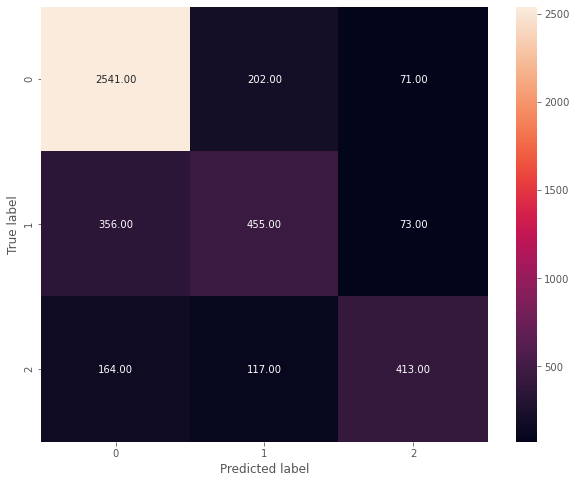

In [35]:
def draw_cm( actual, predicted ):
    fig = plt.figure(figsize=(10., 8.))
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f' )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm(y_test, result)

#### TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer(max_features=1200)
data_features = vectorizer.fit_transform(dfs['text'])
data_features = data_features.toarray()
data_features.shape

(14640, 1200)

#### Split again

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

#### Train Random Forest Clas. model

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


forest = RandomForestClassifier(n_estimators=200, n_jobs=5)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=5,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7314207650273225


>* TF-IDF training accuracy: 70+%

#### Get test data accuracy and predictions

In [39]:
result = forest.predict(X_test)
acc_RF = accuracy_score(y_test, result)
acc_RF

0.7777777777777778

>* TF-IDF test data accuracy: 75+%

#### Confusion Matrix 0 = Negative, 1 = Neutral, 2 = Positive

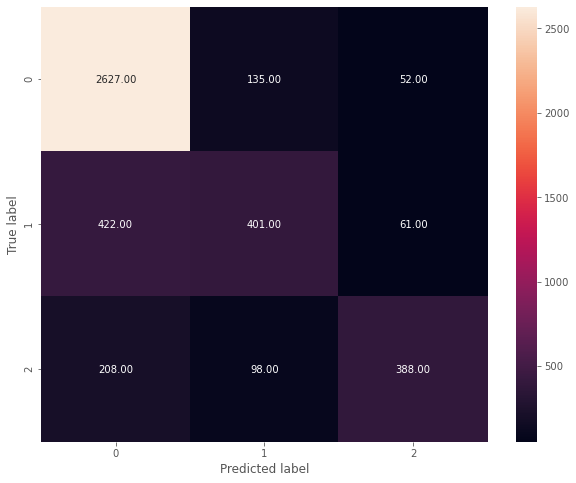

In [40]:
draw_cm(y_test, result)

### Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset

#### Understanding of Pre-Processing

>* The objective of this project is to predict the sentiment of tweets for airlines in supervised learning environment. That means we already know if a tweet was positive or negative, and we can validate accuracy. 
>* Multiple pre-processing techniques were used to make sure we are passing only important words to the Vectorizer. 
>>* We removed HTML tags, numbers, contractions and punctuations, and then copied everything into a lower case. 
>>* Sometimes when taking sentiments into consideration, we may not want to convert into lower cases or remove punctuations because the sentence can loose its meaning, but for the objective of this project this was an ask. 
>>* We did tokenization so that we can remove stopwords. stopwords are words which does not affect the outcome one way or the other, so they can be removed. We came up with a custom list of stopwords to make sure we are including negative sentiments. 
>>* Then we performed lemmatization to convert inflections to root words. for e.g. flying to fly. 
>>* After performing tokenization we performed preprocessing steps again to make sure nothing is missed. 
>>* Now our data is ready to be passed to the vectorization

#### Understanding of Vectorization

>* Count Vectorization: As the name suggests count vectorization counts frequency of each token. 
>>* for example first tweet "virginamerica dhepburn say" will become virginamerica 1, dhepburn 1, say 1. 
>>* In this case we are only considering first 1200 features which have the highest frequncy of occurences. 
>* TF-IDF Vectorization: term frequency times inverse document frequency is for considering weights of individual tokens in considering all documents. so in this taking first 2 tweets(documents): 
>>* virginamerica 1, dhepburn 1, say 1
>>* virginamerica 1, plus 1, add 1, commercials 1, experience 1, tacky 1
>>* tfidf for individual tokens:
>>>* tf for virginamerica in first document = 1/3
>>>* tf for virginamerica in second document = 1/6
>>>* idf = log(2/2) = 0
>>* weight or tfidf (tf*idf) of the token virginamerica = 0, which makes sense.

#### Model Performance

>* For both models we did not see a significant difference in the Count Vectorizer model and TF-IDF model. Both models provided a test accuracy of 75+% and can be considered average. However, model performance in NLP is very much dependent on processing speed. Tried with 10000 features, but becuase of memory, cpu restrictions it did not finish. 
>* A difference was noticed that the accuracy prediction of negative sentiment got better with tdidf, because tfidf considers weight. 